In [65]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Natural Language Toolkit
import nltk
#Importing String for list of punctuations
import string
#Importing module for text corrections
import textblob

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.metrics import roc_Curve, auc

#Importing stopwords list
from nltk.corpus import stopwords
#Importing Lemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
#Importing Tokenizer
from nltk.tokenize import RegexpTokenizer
#Importing TextBlob
from textblob import TextBlob

import os 

In [66]:
data = pd.read_csv(r'C:\Users\Dell\Desktop\final_year project\daraz_reviews.csv', encoding="ISO-8859-1")
 #renaming for ease

            


In [67]:
data.rename(columns = {'Type':'type','Product':'product','Created At':'created_at','Status':'status','Rejection Reason':'rejection_reason','Rating':'rating','Platform':'platform','Review detail':'review_text'}, inplace = True)
data

,type,product,created_at,status,rejection_reason,rating,platform,Origin of review,review_text
0,PRODUCT_REVIEW,Beige Boat Island Suede Ballerinas,7/4/2022 14:54,approved,NaN,5,androidApp,NaN,NaN
1,PRODUCT_REVIEW,60cm x 3m Kitchen Aluminum Sticker Oil Proof W...,7/4/2022 16:12,approved,NaN,5,androidApp,NaN,thank u soo much daraz online ....im glad to b...
2,PRODUCT_REVIEW,Mellow Full Sleeve V Neck Tshirt For Women,7/4/2022 21:32,approved,NaN,5,iosApp,NaN,Quality best ??????<br/>Possibile xa vne aru c...
3,PRODUCT_REVIEW,Silicon Star Shaped Based Bathroom (Tub) Kitch...,7/4/2022 23:06,approved,NaN,4,androidApp,NaN,NaN
4,PRODUCT_REVIEW,Flite Brown Pu Slipper For Men PUG-501,7/4/2022 16:38,approved,NaN,5,androidApp,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9995,PRODUCT_REVIEW,TVS Genuine Engine Oil For RTR 2004v & RTR 160 4v,6/22/2022 13:10,approved,NaN,5,androidApp,NaN,Must be genuine... I have no idea to distingui...
9996,PRODUCT_REVIEW,"Bajaj Pulsar 150 New BS6 - BS4,BS3,BS2 - UV Pr...",6/22/2022 14:19,approved,NaN,5,iosApp,NaN,Little bit short for my ns. But according to p...
9997,PRODUCT_REVIEW,Luxurious 100% Cotton Striped 2 Piece Pillow Set,6/22/2022 14:52,approved,NaN,5,androidApp,NaN,good l
9998,PRODUCT_REVIEW,Goop Standard Mini Battery Charger,6/22/2022 13:11,approved,NaN,5,androidApp,NaN,"nice product, working properly as of now, let'..."


In [68]:
data.dropna(subset = ['review_text'], axis = 0, inplace = True)


data.reset_index(inplace = True, drop = True)

In [69]:
data.describe()

,rating,Origin of review
count,5002.000000,0.0
mean,4.139944,NaN
std,1.454367,NaN
min,1.000000,NaN
25%,4.000000,NaN
50%,5.000000,NaN
75%,5.000000,NaN
max,5.000000,NaN


In [70]:
data.dtypes

type                 object
product              object
created_at           object
status               object
rejection_reason     object
rating                int64
platform             object
Origin of review    float64
review_text          object
dtype: object

In [71]:
data['word_count'] = data['review_text'].apply(lambda x: len(str(x).split(" ")))
data[['review_text','word_count']].head(15)

,review_text,word_count
0,thank u soo much daraz online ....im glad to b...,14
1,Quality best ??????<br/>Possibile xa vne aru c...,29
2,Thank you daraz and mansalu for this really go...,15
3,good quality ????,3
4,ramrai cha product maan paryo,5
5,it's so different than what you show in photo ...,15
6,Finally maile Mero Saman paye Ani taste ni Gar...,39
7,kastoo chartikala hoo Yoo daraz ko ...t shirt ...,60
8,Loved it..cheap yet best??,4
9,What I ordered and what i received. I ordered ...,52


In [72]:
data['Edited'] = data['review_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

data['Edited'].head()

0    thank u soo much daraz online ....im glad to b...
1    quality best ??????<br/>possibile xa vne aru c...
2    thank you daraz and mansalu for this really go...
3                                    good quality ????
4                        ramrai cha product maan paryo
Name: Edited, dtype: object

In [73]:
data['Edited'] = data['Edited'].str.replace('[^\w\s]','')
data['Edited'].head()

0    thank u soo much daraz online im glad to be se...
1    quality best brpossibile xa vne aru color ni s...
2    thank you daraz and mansalu for this really go...
3                                        good quality 
4                        ramrai cha product maan paryo
Name: Edited, dtype: object

In [74]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop = nltk.corpus.stopwords.words('english')
data['Edited'] = data['Edited'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Edited'].head()

0         thank u soo much daraz online im glad served
1    quality best brpossibile xa vne aru color ni s...
2    thank daraz mansalu really good ukulele sound ...
3                                         good quality
4                        ramrai cha product maan paryo
Name: Edited, dtype: object

In [76]:
freq = pd.Series(' '.join(data['Edited']).split()).value_counts()[:10]
freq = list(freq.index)

data['Edited'] = data['Edited'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

data['Edited'].head()

0                     u soo much online im glad served
1    best brpossibile vne aru color ni stock rakhnu...
2            mansalu really ukulele sound also awesome
3                                                     
4                                ramrai cha maan paryo
Name: Edited, dtype: object

In [77]:
freq = pd.Series(' '.join(data['Edited']).split()).value_counts()[-10:]

freq = list(freq.index)
data['Edited'] = data['Edited'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Edited'].head(10)

0                     u soo much online im glad served
1    best brpossibile vne aru color ni stock rakhnu...
2            mansalu really ukulele sound also awesome
3                                                     
4                                ramrai cha maan paryo
5       different show photo thanks complementary gift
6    finally maile mero saman paye ani taste ni gar...
7    kastoo chartikala hoo yoo ko shirt order garya...
8                               loved itcheap yet best
9    ordered received ordered lakme cc shade 2 hone...
Name: Edited, dtype: object

In [78]:
from textblob import TextBlob
nltk.download('wordnet')
nltk.download('brown')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [79]:
from textblob import TextBlob
for x in data.index:
    data['Edited'][x] = TextBlob(data['Edited'][x]).words
data.Edited.head()


0             [u, soo, much, online, im, glad, served]
1    [best, brpossibile, vne, aru, color, ni, stock...
2     [mansalu, really, ukulele, sound, also, awesome]
3                                                   []
4                           [ramrai, cha, maan, paryo]
Name: Edited, dtype: object

In [80]:
 import nltk
 nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [81]:
lem = WordNetLemmatizer()

data['Edited'] = data['Edited'].apply(lambda x: ([lem.lemmatize(word, pos = 'n') for word in x]))
data['Edited'] = data['Edited'].apply(lambda x: ([lem.lemmatize(word, pos = 'r') for word in x]))
data['Edited'] = data['Edited'].apply(lambda x: ([lem.lemmatize(word, pos = 'v') for word in x]))
data['Edited'] = data['Edited'].apply(lambda x: ([lem.lemmatize(word, pos = 'a') for word in x]))
data.Edited.head()

0              [u, soo, much, online, im, glad, serve]
1    [best, brpossibile, vne, aru, color, ni, stock...
2     [mansalu, really, ukulele, sound, also, awesome]
3                                                   []
4                           [ramrai, cha, maan, paryo]
Name: Edited, dtype: object

In [82]:
from nltk.corpus import wordnet
for i in data.index:
    only_recognized_words = []
    for t in data.Edited[i]:
        if wordnet.synsets(t):
            if t.isalpha():
                only_recognized_words.append(t)
    data.Edited[i] = only_recognized_words 
data.Edited.head()

0                       [u, much, online, glad, serve]
1    [best, color, ni, stock, na, man, color, ni, s...
2              [really, ukulele, sound, also, awesome]
3                                                   []
4                                                   []
Name: Edited, dtype: object

In [83]:
for i in data.index:
    data.Edited[i] = ' '.join(data.Edited[i])

In [84]:
set1 = []

for i in data.index:
    if data.rating[i]>3:
        set1.append('Good')
    else:
        set1.append('Bad')
data['rating_class'] = set1

#good = 1, bad = 0
data['binary_rating'] = 0
data.loc[data.rating_class == 'Good',['binary_rating']] = 1
data.head()

,type,product,created_at,status,rejection_reason,rating,platform,Origin of review,review_text,word_count,Edited,rating_class,binary_rating
0,PRODUCT_REVIEW,60cm x 3m Kitchen Aluminum Sticker Oil Proof W...,7/4/2022 16:12,approved,NaN,5,androidApp,NaN,thank u soo much daraz online ....im glad to b...,14,u much online glad serve,Good,1
1,PRODUCT_REVIEW,Mellow Full Sleeve V Neck Tshirt For Women,7/4/2022 21:32,approved,NaN,5,iosApp,NaN,Quality best ??????<br/>Possibile xa vne aru c...,29,best color ni stock na man color ni stock order,Good,1
2,PRODUCT_REVIEW,"Manaslu Danfe 26"" Tenor EQ Ukulele With Free Bag",7/4/2022 18:12,approved,NaN,5,androidApp,NaN,Thank you daraz and mansalu for this really go...,15,really ukulele sound also awesome,Good,1
3,PRODUCT_REVIEW,Combo of 1 Eyelash Curler And 2 Pair False Eye...,7/4/2022 13:45,approved,NaN,3,androidApp,NaN,good quality ????,3,,Bad,0
4,PRODUCT_REVIEW,Buy One Get One Free Combo Of Navratna Cool Ta...,7/4/2022 13:19,approved,NaN,5,androidApp,NaN,ramrai cha product maan paryo,5,,Good,1


In [85]:
f_data = data[['product','Edited','rating','rating_class','binary_rating']]
f_data.head()

,product,Edited,rating,rating_class,binary_rating
0,60cm x 3m Kitchen Aluminum Sticker Oil Proof W...,u much online glad serve,5,Good,1
1,Mellow Full Sleeve V Neck Tshirt For Women,best color ni stock na man color ni stock order,5,Good,1
2,"Manaslu Danfe 26"" Tenor EQ Ukulele With Free Bag",really ukulele sound also awesome,5,Good,1
3,Combo of 1 Eyelash Curler And 2 Pair False Eye...,,3,Bad,0
4,Buy One Get One Free Combo Of Navratna Cool Ta...,,5,Good,1


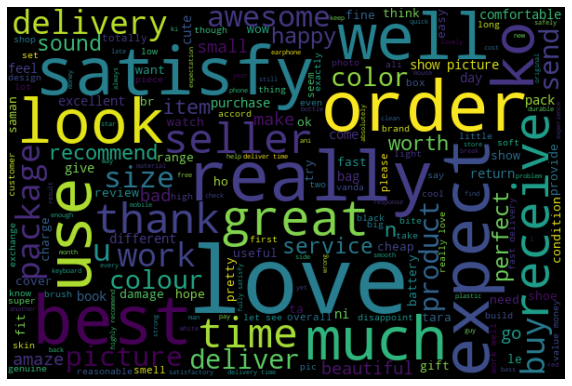

In [86]:
#wordCLoud
from wordcloud import WordCloud
good_words = ' '.join([text for text in f_data[f_data.rating_class == 'Good']['Edited']])
wordcloud = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 100).generate(good_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

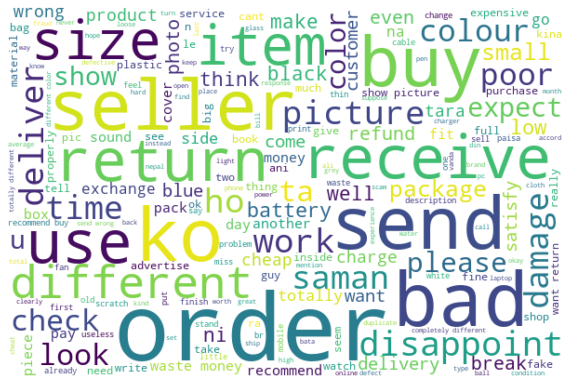

In [87]:
from wordcloud import WordCloud
bad_words = ' '.join([text for text in f_data[f_data.rating_class == 'Bad']['Edited']])
wordcloud = WordCloud(width = 600, height = 400, random_state = 21,background_color="white", max_font_size = 100).generate(bad_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [88]:
for row in f_data.itertuples():
    review = f_data.at[row[0], 'Edited']
#run sentiment using TextBlob
    analysis = TextBlob(review)
#set value to dataframe
    f_data.at[row[0], 'polarity'] = analysis.sentiment[0]
    f_data.at[row[0], 'subjectivity'] = analysis.sentiment[1]
#Create Positive / negative column depending on polarity
    if analysis.sentiment[0]>0:
        f_data.at[row[0], 'sentiment'] = "Positive"
    elif analysis.sentiment[0]<0:
        f_data.at[row[0], 'sentiment'] = "Negative"
   

In [89]:
data1= f_data[["Edited","polarity","sentiment"]]
data1

,Edited,polarity,sentiment
0,u much online glad serve,0.350000,Positive
1,best color ni stock na man color ni stock order,1.000000,Positive
2,really ukulele sound also awesome,0.533333,Positive
3,,0.000000,NaN
4,,0.000000,NaN
...,...,...,...
4997,item happy happy,0.800000,Positive
4998,must genuine idea distinguish container use au...,0.150000,Positive
4999,little bite short n accord much buy third time...,0.002083,Positive
5000,l,0.000000,NaN


In [90]:
text_label = data1['sentiment']

In [91]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
y = lbl.fit_transform(text_label)
print(y)

[1 1 1 ... 1 2 0]


In [92]:
y = to_categorical(y)

In [93]:
X = data1['Edited']
print(X)

0                                u much online glad serve
1         best color ni stock na man color ni stock order
2                       really ukulele sound also awesome
3                                                        
4                                                        
                              ...                        
4997                                     item happy happy
4998    must genuine idea distinguish container use au...
4999    little bite short n accord much buy third time...
5000                                                    l
5001                      work properly let see long term
Name: Edited, Length: 5002, dtype: object


In [94]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout
import re
from keras.metrics import Precision, Recall

In [95]:
token = Tokenizer(oov_token="<OOV>")
token.fit_on_texts(X)
word_index = token.word_index
seq = token.texts_to_sequences(X)
train_padding = pad_sequences(seq , maxlen = 50 , padding = 'pre')
train_padding.shape

(5002, 50)

In [96]:
EMBEDDING_DIM = 200
model = Sequential()
model.add(Embedding(50000, EMBEDDING_DIM, input_length=train_padding.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(128, dropout=0.2,return_sequences=True))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(32))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 200)           10000000  
                                                                 
 dropout_10 (Dropout)        (None, 50, 200)           0         
                                                                 
 lstm_10 (LSTM)              (None, 50, 128)           168448    
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 3)                

In [97]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
epochs = 10
batch_size = 32
model.fit(train_padding, y, 
          epochs=epochs, 
          batch_size=batch_size,
          validation_split=0.2, verbose = 1, callbacks=[es])

Epoch 1/10
126/126 [==============================] - 32s 212ms/step - loss: 0.7545 - accuracy: 0.6646 - precision_5: 0.7245 - recall_5: 0.5634 - val_loss: 0.4248 - val_accuracy: 0.8202 - val_precision_5: 0.8635 - val_recall_5: 0.7712
Epoch 2/10
126/126 [==============================] - 26s 208ms/step - loss: 0.2597 - accuracy: 0.9090 - precision_5: 0.9246 - recall_5: 0.8883 - val_loss: 0.2324 - val_accuracy: 0.9241 - val_precision_5: 0.9329 - val_recall_5: 0.9171
Epoch 2: early stopping


In [99]:
from keras.models import load_model
model.save('rnnmodel.h5')
model_final = load_model('rnnmodel.h5')